# Assignment on Preprocessing

### 1. Load the dataset into python environment

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
data=pd.read_csv('titanic_dataset.csv')

In [167]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column


In [168]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [169]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [171]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
data.shape

(891, 11)

### 4. Fill in all the missing values present in all the columns in the dataset

In [173]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### The columns of Age, Cabin and Embaeked contain null values
#### Age and embarked datas have less number of missing values ,so we will impute them
#### But data of cabin can be dropped due to high percentage of missing values

In [174]:
data1=data.drop('Cabin', axis=1)

In [175]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

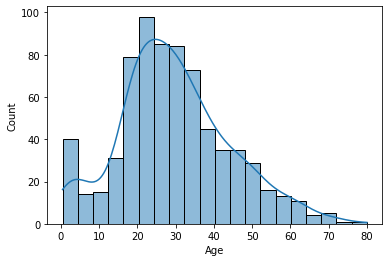

In [176]:
sns.histplot(data1['Age'],kde=True)

##### here data is right skewed ,so we use median to fill null values

In [177]:
data1['Age']=data1['Age'].fillna(data1['Age'].median())

##### OR 
##### we can use interpolate()
##### data1['Age']=data1['Age'].interpolate()

In [178]:
data1['Embarked']=data1['Embarked'].fillna(data1['Embarked'].fillna('Unknown'))

In [179]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

#####  Outlier detection and handling of Age

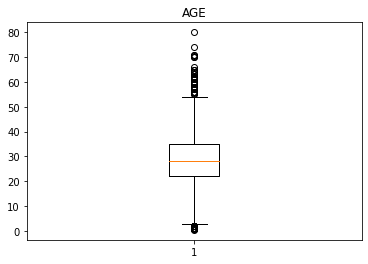

In [180]:
plt.boxplot(data1['Age'])
plt.title('AGE')
plt.show()

In [181]:
age_Q1=np.percentile(data1['Age'],25,interpolation='midpoint')
age_Q2=np.percentile(data1['Age'],50,interpolation='midpoint')
age_Q3=np.percentile(data1['Age'],75,interpolation='midpoint')
print(age_Q1)
print(age_Q2)
print(age_Q3)

22.0
28.0
35.0


In [182]:
age_IQR=age_Q3-age_Q1
age_IQR

13.0

In [183]:
lower_lim=age_Q1-1.5*age_IQR
upper_lim=age_Q3+1.5*age_IQR

In [184]:
lower_lim

2.5

In [185]:
upper_lim

54.5

In [186]:
age_outliers=[]
for n in data1['Age']:
    if (n>upper_lim) or (n<lower_lim):
        age_outliers.append(n)

In [187]:
age_outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [188]:
index1=data1['Age']>upper_lim
data1.loc[index1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [189]:
index2=data1['Age']<lower_lim
data1.loc[index2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [190]:
data2=data1.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832])

In [191]:
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [192]:
# we can fill the outliers with interpolate() also
# data2=data1.iloc[[ 12,  16,  34,  55,  95, 97, 117, 153, 171, 175, 196, 233, 253,
#            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
#            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
#            830, 852, 880,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
#            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832]]

# data2['Age']=data2['Age'].interpolate()

# data3=pd.concat([data1,data2])
# data3

#### Outlier detection and handling of Fare

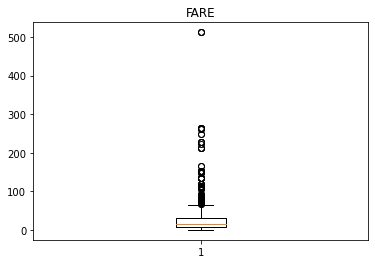

In [193]:
plt.boxplot(data['Fare'])
plt.title('FARE')
plt.show()

In [194]:
fare_Q1=np.percentile(data['Fare'],25)
fare_Q2=np.percentile(data['Fare'],50)
fare_Q3=np.percentile(data['Fare'],75)
print(fare_Q1)
print(fare_Q2)
print(fare_Q3)

7.9104
14.4542
31.0


In [195]:
fare_IQR=fare_Q3-fare_Q1
fare_IQR

23.0896

In [196]:
fare_lower_lim=fare_Q1-1.5*fare_IQR
fare_upper_lim=fare_Q3+1.5*fare_IQR

In [197]:
fare_lower_lim

-26.724

In [198]:
fare_upper_lim

65.6344

In [199]:
fare_outliers=[]
for n in data['Fare']:
    if (n>fare_upper_lim) or (n<fare_lower_lim):
        fare_outliers.append(n)

In [200]:
fare_outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [201]:
index=data2['Fare']>fare_upper_lim
data3=data2.loc[index].index
data3

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=104)

In [202]:
data2=data2.drop([2, 28, 32, 35, 53, 62, 63, 73, 89, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864])

In [203]:
data2.shape

(721, 10)

In [204]:
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


#### Outlier detection and handling of SibSp data

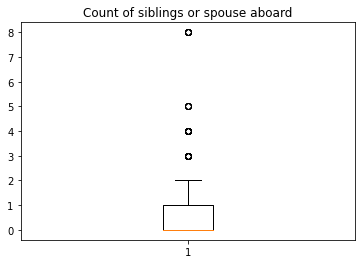

In [205]:
plt.boxplot(data['SibSp'])
plt.title('Count of siblings or spouse aboard')
plt.show()

In [206]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

#### Outliers are 3,4,5,8 .The data of SibSp dont  have much important .So we  can drop the column if we want

In [207]:
data2=data2.drop('SibSp',axis=1)

In [208]:
data2

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,2,W./C. 6607,23.4500,S


#### Outlier detection and handling of Parch data

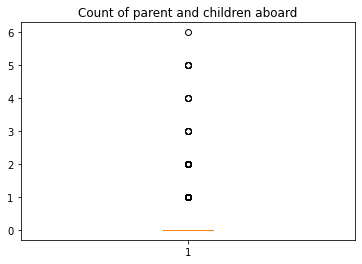

In [209]:
plt.boxplot(data['Parch'])
plt.title('Count of parent and children aboard')
plt.show()

In [210]:
# we can also drop this data 

In [211]:
data2=data2.drop('Parch',axis=1)

In [212]:
data2

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [213]:
data2=data2.reset_index()
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...
716,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S
717,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S
718,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S
719,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C


In [214]:
data2['Ticket'].nunique()

600

In [215]:
data2['Embarked'].nunique()

3

In [216]:
data2=data2.drop(['PassengerId','Name','Ticket'],axis=1)

In [217]:
data2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,3,female,26.0,7.9250,S
2,1,1,female,35.0,53.1000,S
3,0,3,male,35.0,8.0500,S
4,0,3,male,28.0,8.4583,Q
...,...,...,...,...,...,...
716,0,2,male,27.0,13.0000,S
717,1,1,female,19.0,30.0000,S
718,0,3,female,28.0,23.4500,S
719,1,1,male,26.0,30.0000,C


#### Encode  datas using label encoding

In [218]:
from sklearn import preprocessing

In [219]:
label_encoder=preprocessing.LabelEncoder()

In [220]:
data2['Sex']=label_encoder.fit_transform(data2['Sex'])

In [221]:
data2['Embarked']=label_encoder.fit_transform(data2['Embarked'])

In [222]:
data2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,3,0,26.0,7.9250,2
2,1,1,0,35.0,53.1000,2
3,0,3,1,35.0,8.0500,2
4,0,3,1,28.0,8.4583,1
...,...,...,...,...,...,...
716,0,2,1,27.0,13.0000,2
717,1,1,0,19.0,30.0000,2
718,0,3,0,28.0,23.4500,2
719,1,1,1,26.0,30.0000,0


In [223]:
X=data2.drop(['Pclass','Sex','Embarked','Survived'],axis=1)

In [224]:
X

,Age,Fare
0,22.0,7.2500
1,26.0,7.9250
2,35.0,53.1000
3,35.0,8.0500
4,28.0,8.4583
...,...,...
716,27.0,13.0000
717,19.0,30.0000
718,28.0,23.4500
719,26.0,30.0000


### Min-Max scaling with 'survived' as target

In [225]:
min_max_scalar=preprocessing.MinMaxScaler(feature_range=(0,1))

In [226]:
X=min_max_scalar.fit_transform(X)

In [227]:
type(X)

numpy.ndarray

In [228]:
X=pd.DataFrame(X,columns=['Age','Fare'])

In [229]:
X.head()

,Age,Fare
0,0.372549,0.111538
1,0.450980,0.121923
2,0.627451,0.816923
3,0.627451,0.123846
4,0.490196,0.130128


In [230]:
X.describe()

,Age,Fare
count,721.000000,721.000000
mean,0.492045,0.267536
std,0.196509,0.208662
min,0.000000,0.000000
25%,0.372549,0.121474
50%,0.490196,0.188846
75%,0.588235,0.400000
max,1.000000,1.000000


In [231]:
data2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,3,0,26.0,7.9250,2
2,1,1,0,35.0,53.1000,2
3,0,3,1,35.0,8.0500,2
4,0,3,1,28.0,8.4583,1


In [232]:
X1=data2.drop(['Age','Fare','Survived'],axis=1)

In [233]:
X1.head()

,Pclass,Sex,Embarked
0,3,1,2
1,3,0,2
2,1,0,2
3,3,1,2
4,3,1,1


In [234]:
X=pd.concat([X1,X],axis=1)

In [235]:
X.head()

,Pclass,Sex,Embarked,Age,Fare
0,3,1,2,0.372549,0.111538
1,3,0,2,0.450980,0.121923
2,1,0,2,0.627451,0.816923
3,3,1,2,0.627451,0.123846
4,3,1,1,0.490196,0.130128


In [236]:
X.describe()

,Pclass,Sex,Embarked,Age,Fare
count,721.000000,721.000000,721.000000,721.000000,721.000000
mean,2.509015,0.679612,1.610264,0.492045,0.267536
std,0.717046,0.466950,0.727900,0.196509,0.208662
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.372549,0.121474
50%,3.000000,1.000000,2.000000,0.490196,0.188846
75%,3.000000,1.000000,2.000000,0.588235,0.400000
max,3.000000,1.000000,2.000000,1.000000,1.000000


In [237]:
Y=data2['Survived']

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [239]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=42, test_size=0.2)

In [240]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [241]:
print('The mean squared error value is:', mean_squared_error(Y_test,predictions))
print('The r squared value is:', r2_score(Y_test,predictions))

The mean squared error value is: 0.14718114311661595
The r squared value is: 0.34852978231013687
